In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
#倒入一些必要的库

In [3]:
feanum=1#一共有多少特征
window=7#时间窗设置
 #读取数据

df1 = pd.read_csv('D:/R test/tst-mas-d-972950.csv')
df1=df1.iloc[:,1:]#删除前两列没用的
l=len(df1)

df1.tail()

,n
149,29
150,30
151,32
152,22
153,25


In [4]:
from sklearn import preprocessing#进行归一化操作
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
df.tail()

,n
149,0.452381
150,0.476190
151,0.523810
152,0.285714
153,0.357143


In [5]:
#这一部分在处理数据 将原始数据改造为模型需要的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
data = stock.values #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length+1):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=14#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [6]:
#展示下训练集测试集的形状 看有没有问题
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 7, 1)
y_train (133,)
X_test (14, 7, 1)
y_test (14,)


In [7]:
#更改数组shape
X_train=X_train.reshape(len(X_train),window)
y_train=y_train.reshape(len(X_train))
X_test=X_test.reshape(cut,window)
y_test=y_test.reshape(cut)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)


X_train (133, 7)
y_train (133,)
X_test (14, 7)
y_test (14,)


In [8]:
# Fit regression model
from sklearn.svm import SVR  
svr = SVR(kernel='rbf', gamma=0.1) 
model = svr.fit(X_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path

In [9]:
svr.get_params

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [10]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)

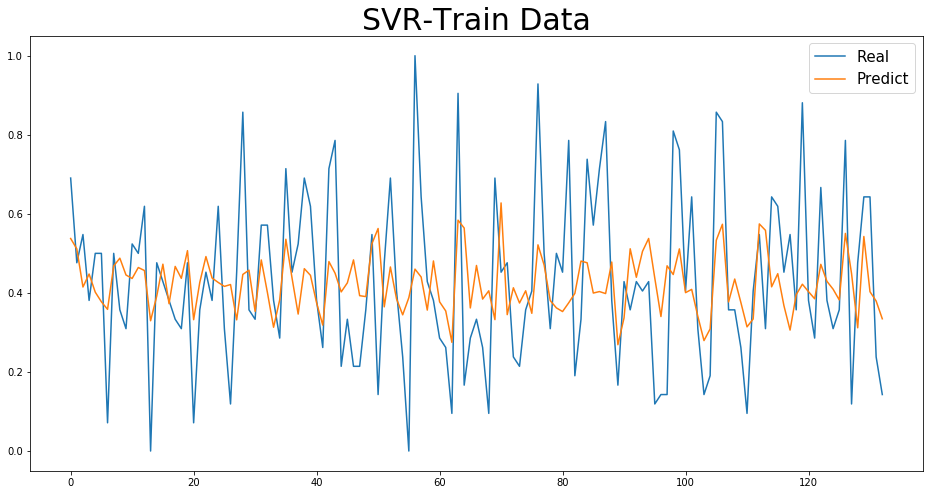

In [11]:
#draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
#draw.iloc[100:400,0].plot(figsize=(12,6))
#draw.iloc[100:400,1].plot(figsize=(12,6))
plt.figure(figsize=(16, 8))
plt.plot(y_train, label='Real')

plt.plot(y_train_predict, label='Predict')
plt.legend(loc='best')

plt.legend(('Real', 'Predict'),loc='upper right',fontsize='15')
plt.title("SVR-Train Data",fontsize='30') #添加标题
plt.show()
#plt.savefig('SVRtrain.pdf')
#展示在训练集上的表现 

In [12]:
#在测试集上的预测
y_test_predict=model.predict(X_test)

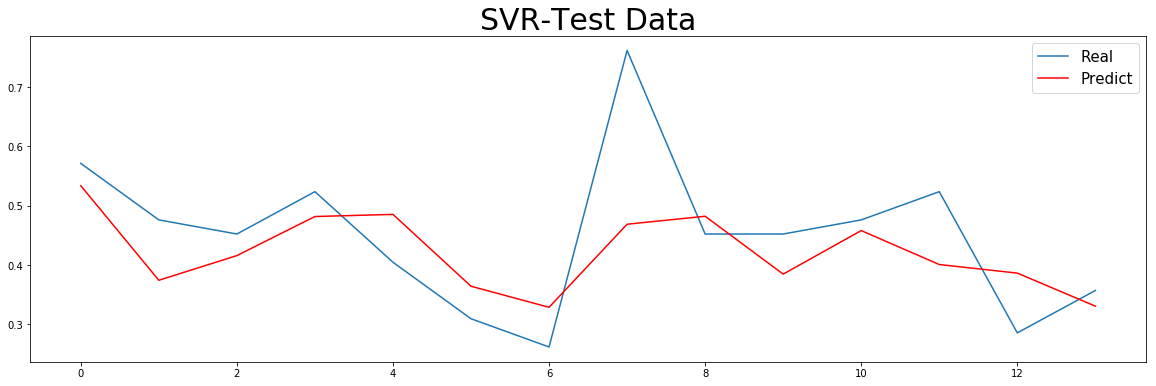

<Figure size 432x288 with 0 Axes>

In [13]:
#draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
#draw.iloc[:,0].plot(figsize=(12,6))
#draw.iloc[:,1].plot(figsize=(12,6))
plt.figure(figsize=(20,6))  # 创建图形
plt.plot(y_test)
##xxx = np.arange(190, 204, 1)
##print(xxx)
#plt.plot(xxx,y_test)
plt.plot(y_test_predict,color='red')

plt.legend(('Real', 'Predict'),loc='upper right',fontsize='15')
plt.title("SVR-Test Data",fontsize='30') #添加标题
plt.show()
plt.savefig('SVRtest96.pdf')
#展示在测试集上的表现 

In [14]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [15]:
import math
from math import sqrt
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def mpe(y_true, y_pred):
    return np.mean((y_pred - y_true) / y_true) * 100
def me(y_true, y_pred):
    return np.mean((y_pred - y_true) )


print('训练集上的MAE/MSE/MAPE/MPE/ME')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train))      
print(mape(y_train_predict, y_train) )
print(mpe(y_train_predict, y_train) )
print(me(y_train_predict, y_train) )

print('测试集上的MAE/MSE/MAPE/MPE/ME')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
print(mpe(y_test_predict, y_test) )
print(me(y_test_predict, y_test) )

训练集上的MAE/MSE/MAPE/MPE/ME
0.1605892785511674
0.03913433569303034
38.39759443633888
1.6603788303571811
0.010210377361871114
测试集上的MAE/MSE/MAPE/MPE/ME
0.07705800440802098
0.010461027252567935
18.472009971111817
6.429331303314361
0.029465312609287222


In [16]:
y_test_predict

array([0.53376523, 0.37438925, 0.41599872, 0.48187661, 0.48548795,
       0.36430901, 0.32880529, 0.46889534, 0.48235417, 0.3847579 ,
       0.45818598, 0.40093709, 0.38647814, 0.33076874])

In [17]:
y_test

array([0.57142857, 0.47619048, 0.45238095, 0.52380952, 0.4047619 ,
       0.30952381, 0.26190476, 0.76190476, 0.45238095, 0.45238095,
       0.47619048, 0.52380952, 0.28571429, 0.35714286])